# Scattering pada Gelombang Cahaya
Scattering pada gelombang cahaya terjadi ketika cahaya berinteraksi dengan partikel-partikel atau struktur dalam medium yang dilewati. Ketika cahaya melewati medium, seperti udara, air, atau partikel-partikel kecil di udara, beberapa fenomena scattering yang umum terjadi adalah dispersi Rayleigh dan scattering Mie.





Simulasi Dispersi Rayleigh: Dispersi Rayleigh terjadi ketika partikel-partikel kecil dalam medium menyebabkan scattering cahaya. Simulasi ini dapat memperlihatkan bagaimana cahaya dengan panjang gelombang yang berbeda (misalnya, merah, hijau, dan biru) dihamburkan dalam berbagai arah oleh partikel-partikel tersebut. Simulasi ini memungkinkan kita untuk memahami mengapa langit tampak biru pada siang hari dan mengapa matahari terbenam tampak merah.

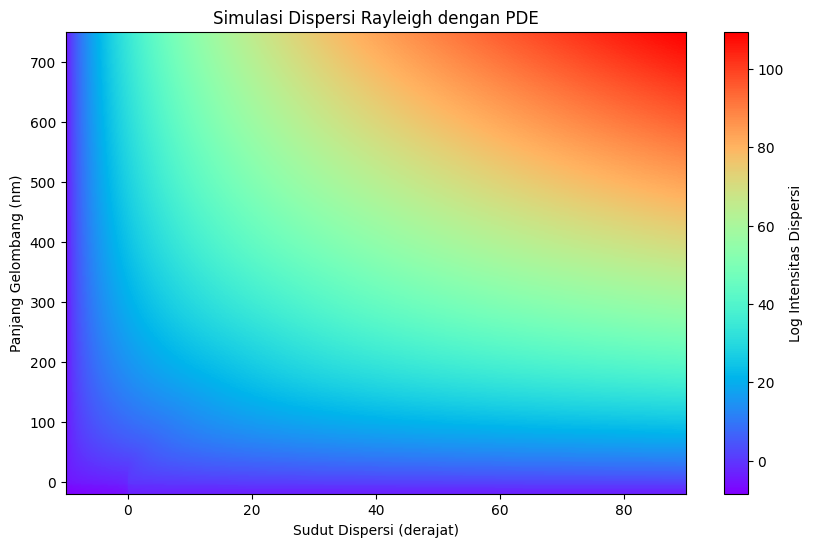

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Mengatur parameter simulasi
wavelengths = np.linspace(-20, 750, 100)  # Panjang gelombang dalam nanometer
scatter_angles = np.linspace(-10, 90, 500)  # Sudut dispersi dalam derajat
particle_radius = 0.1  # Radius partikel dalam mikrometer

# Mengatur parameter grid
num_wavelengths = len(wavelengths) #Menyimpan jumlah panjang gelombang dalam variabel
num_scatter_angles = len(scatter_angles) #Menyimpan jumlah sudut dispersi dalam variabel
dx = scatter_angles[1] - scatter_angles[0] #Menghitung selisih antara dua sudut dispersi berturut-turut dan menyimpannya dalam variabel dx.
dt = wavelengths[1] - wavelengths[0] #Menghitung selisih antara dua panjang gelombang berturut-turut dan menyimpannya dalam variabel dt.
k = np.pi / wavelengths[:, np.newaxis] #Menghitung vektor gelombang k dengan membagi nilai pi dengan setiap panjang gelombang dalam array wavelengths.
sin_squared = 2*np.sin(np.deg2rad(scatter_angles))**2 #Nilai ini akan digunakan dalam perhitungan intensitas dispersi.

# Inisialisasi matriks intensitas dispersi
intensity_matrix = np.zeros((num_wavelengths, num_scatter_angles)) #Membuat matriks nol dengan dimensi (num_wavelengths, num_scatter_angles) untuk menyimpan intensitas dispersi.

# Menghitung intensitas dispersi dengan pendekatan numerik PDE Simulasi Dispersi Rayleigh dengan PDE Finite Difference
for i in range(num_wavelengths): #Melakukan iterasi untuk setiap panjang gelombang.
    for j in range(num_scatter_angles): #Melakukan iterasi untuk setiap sudut dispersi.
        if sin_squared[j] == 0: #Memeriksa apakah sin_squared[j] sama dengan nol.
            intensity_matrix[i, j] = 0  # Menghindari pembagian oleh nol
        else:
            intensity_matrix[i, j] = (k[i]**4 * particle_radius**6) / (3 * sin_squared[j]) #rumus Rayleigh scattering + finite difference

        if i > 0:
            intensity_matrix[i, j] += intensity_matrix[i-1, j]  # Menambahkan kontribusi intensitas sebelumnya

        if j > 0:
            intensity_matrix[i, j] += intensity_matrix[i, j-1]  # Menambahkan kontribusi intensitas sebelumnya

# Memplot hasil simulasi dengan skala logaritmik dan cmap rainbow
plt.figure(figsize=(10, 6))
plt.imshow(np.log10(intensity_matrix + 1e-16), cmap='rainbow', origin='lower', aspect='auto',
           extent=[scatter_angles[0], scatter_angles[-1], wavelengths[0], wavelengths[-1]])
plt.colorbar(label='Log Intensitas Dispersi')
plt.xlabel('Sudut Dispersi (derajat)')
plt.ylabel('Panjang Gelombang (nm)')
plt.title('Simulasi Dispersi Rayleigh dengan PDE')
plt.show()


Kita mendapati data untuk sudut dispersi cahaya pada pagi,siang dan sore sebagai berikut:


*   Pagi = 30° - 60°
*   siang = 0°, cahaya matahari masuk secara vertikal atau hampir vertikal
*   sore = 30° - 60°

besar panjang gelombang

*   pagi : Rentang panjang gelombang yang sering dikaitkan dengan pagi hari berkisar antara 600 nanometer (nm) hingga 700 nm (merah hingga merah jauh).
*   siang : Rentang panjang gelombang tampak pada siang hari berkisar antara 400 nm (ungu) hingga 700 nm (merah).

*   sore : Rentang panjang gelombang yang sering dikaitkan dengan sore hari juga berkisar antara 600 nm hingga 700 nm (merah hingga merah jauh).











pada saat sudut dispersi atau sudut yang dipantulkan

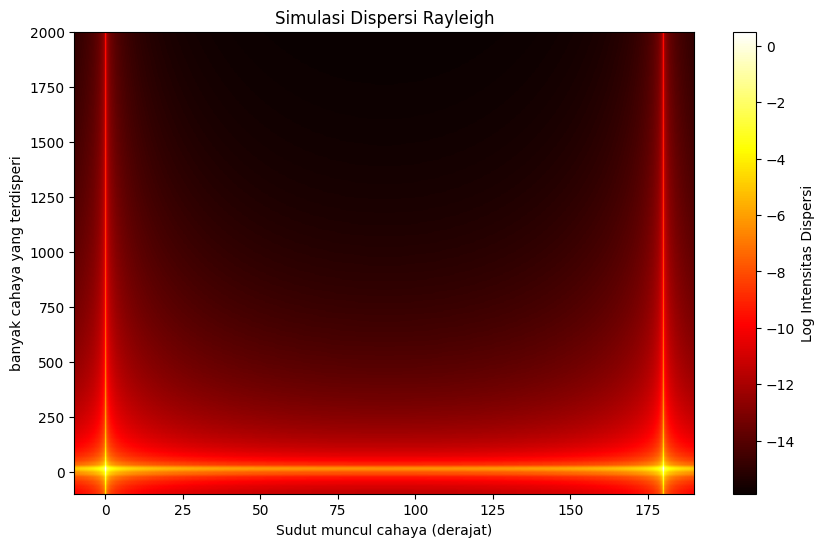

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Mengatur parameter simulasi
wavelengths = np.linspace(-100, 2000, 100)  # Panjang gelombang dalam nanometer
scatter_angles = np.linspace(-10, 190, 500)  # Sudut dispersi dalam derajat
particle_radius = 0.1  # Radius partikel dalam mikrometer

# Fungsi untuk menghitung intensitas dispersi Rayleigh
def calculate_rayleigh_scattering(wavelength, scatter_angle, particle_radius):
    k = 2 * np.pi / wavelength
    sin_squared = np.sin(np.deg2rad(scatter_angle))**2
    if sin_squared == 0:
        scattering_intensity = 0  # Menghindari pembagian oleh nol
    else:
        scattering_intensity = (k**4 * particle_radius**6) / (3 * sin_squared)
    return scattering_intensity

# Membuat matriks intensitas dispersi
intensity_matrix = np.zeros((len(wavelengths), len(scatter_angles)))

# Menghitung intensitas dispersi untuk setiap kombinasi panjang gelombang dan sudut dispersi
for i, wavelength in enumerate(wavelengths):
    for j, scatter_angle in enumerate(scatter_angles):
        intensity_matrix[i, j] = calculate_rayleigh_scattering(wavelength, scatter_angle, particle_radius)

# Memplot hasil simulasi dengan skala logaritmik
plt.figure(figsize=(10, 6))
plt.imshow(np.log10(intensity_matrix + 1e-16), cmap='hot', origin='lower', aspect='auto',
           extent=[scatter_angles[0], scatter_angles[-1], wavelengths[0], wavelengths[-1]])
plt.colorbar(label='Log Intensitas Dispersi')
plt.xlabel('Sudut muncul cahaya (derajat)')
plt.ylabel('banyak cahaya yang terdisperi')
plt.title('Simulasi Dispersi Rayleigh')
plt.show()


Hasil dari code tersebut adalah sebuah plot yang memvisualisasikan intensitas dispersi Rayleigh dalam skala logaritmik. Simulasi ini memperlihatkan bagaimana intensitas cahaya yang dihamburkan oleh partikel-partikel kecil (dalam contoh ini, partikel dengan radius tetap) bervariasi dengan panjang gelombang dan sudut dispersi.

Warna dan Intensitas: Warna pada plot menggambarkan intensitas dispersi
Rayleigh. Semakin terang warnanya, semakin tinggi intensitas dispersi pada titik tersebut. Nilai intensitas dispersi ditampilkan dalam logaritma basis 10, sehingga perbedaan warna menunjukkan perbedaan dalam jumlah intensitas yang signifikan.

Dalam plot tersebut, Anda dapat melihat pola gelombang yang terbentuk. Pola ini disebabkan oleh fenomena dispersi Rayleigh, di mana panjang gelombang yang lebih pendek (seperti biru dan ungu) lebih terdispersi dibandingkan dengan panjang gelombang yang lebih panjang (seperti merah dan kuning).

simulasi ini hanya merupakan ilustrasi sederhana untuk memahami konsep dispersi Rayleigh, dan hasilnya mungkin tidak mewakili fenomena sebenarnya dengan presisi yang tinggi.